In [14]:
!pip install citipy
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-31.683560004452396, -31.311583853018107),
 (-36.613834117207816, 163.56539102937222),
 (23.543200966621356, -172.17967463600914),
 (53.47960881065663, -40.829614153559135),
 (26.248211561924776, 55.354491314602285),
 (-44.26338615370288, -154.21819953349913),
 (-87.06048534163436, -55.21150152190479),
 (-51.99461687691996, -65.41077956865225),
 (-73.57835177360855, -98.9118091362489),
 (39.78411642557785, 16.727994845944664),
 (-33.934653672490164, 88.18166016394332),
 (68.08310809371946, 172.9056479605573),
 (-53.97814233973069, 93.92395567073385),
 (-86.61101760226018, -41.52070696953629),
 (80.92023671650861, 179.96510289823658),
 (39.750115259146924, 26.16260182104034),
 (70.54994566818016, 44.199827682347205),
 (-66.18348135749683, -158.01876617154062),
 (-45.96299966715894, -41.64766824804579),
 (28.48578531815717, 97.01903805222145),
 (-67.5526219552601, -64.75969899905634),
 (-14.260855949374132, 2.742362065441114),
 (49.4032336212002, -149.41051504340936),
 (-17.66459689220

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [18]:
# Import the requests library.
import requests

In [19]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

# Get the text of the 'Get' request.
city_weather.text

# Get the JSON text of the 'Get' request.
city_weather.json()

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

print(city_url)

# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

# Get the JSON data.
boston_data = city_weather.json()

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

boston_data["dt"]

# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3425c6d36437bf9d4407d8a4c0fbaf28
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3425c6d36437bf9d4407d8a4c0fbaf28&q=Boston
City Weather found.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3425c6d36437bf9d4407d8a4c0fbaf28&q=Bston
42.36 -71.06 37.99 93 90 4.7
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | westport
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | bandar-e lengeh
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | rio gallegos
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | trebisacce
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | busselton
Processing Record 14

Processing Record 28 of Set 4 | vardo
Processing Record 29 of Set 4 | mumford
Processing Record 30 of Set 4 | russell
Processing Record 31 of Set 4 | vila velha
Processing Record 32 of Set 4 | shumyachi
Processing Record 33 of Set 4 | oktyabrskoye
Processing Record 34 of Set 4 | joacaba
Processing Record 35 of Set 4 | yar-sale
Processing Record 36 of Set 4 | meiktila
Processing Record 37 of Set 4 | tautira
Processing Record 38 of Set 4 | brae
Processing Record 39 of Set 4 | bhiwani
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | hendijan
City not found. Skipping...
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | luderitz
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | mehriz
Processing Record 46 of Set 4 | umm lajj
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | chulym
Processing Record 49 of Set 4 | kapuskasing
Processing Record 50 of Set 4 | port hedland
Processing Record 1 of Set 

Processing Record 16 of Set 8 | santa fe
Processing Record 17 of Set 8 | francavilla fontana
Processing Record 18 of Set 8 | darien
Processing Record 19 of Set 8 | chazuta
Processing Record 20 of Set 8 | akdepe
Processing Record 21 of Set 8 | zhigansk
Processing Record 22 of Set 8 | celestun
Processing Record 23 of Set 8 | luanda
Processing Record 24 of Set 8 | viedma
Processing Record 25 of Set 8 | mehamn
Processing Record 26 of Set 8 | makasar
Processing Record 27 of Set 8 | ust-kuyga
Processing Record 28 of Set 8 | baker city
Processing Record 29 of Set 8 | dongying
Processing Record 30 of Set 8 | dengzhou
Processing Record 31 of Set 8 | palana
Processing Record 32 of Set 8 | mucurapo
Processing Record 33 of Set 8 | tongchuan
Processing Record 34 of Set 8 | ostrovnoy
Processing Record 35 of Set 8 | bambous virieux
Processing Record 36 of Set 8 | ndele
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | verkhnevilyuysk
Processing Record 39 of Set 8 | aflu
City n

Processing Record 4 of Set 12 | letpadan
Processing Record 5 of Set 12 | kaitong
Processing Record 6 of Set 12 | rio de janeiro
Processing Record 7 of Set 12 | latehar
Processing Record 8 of Set 12 | teya
Processing Record 9 of Set 12 | tetouan
Processing Record 10 of Set 12 | gazanjyk
Processing Record 11 of Set 12 | okhotsk
Processing Record 12 of Set 12 | ejea de los caballeros
Processing Record 13 of Set 12 | san francisco de coray
Processing Record 14 of Set 12 | galveston
Processing Record 15 of Set 12 | novikovo
Processing Record 16 of Set 12 | kieta
Processing Record 17 of Set 12 | balakovo
Processing Record 18 of Set 12 | changli
Processing Record 19 of Set 12 | monterey
Processing Record 20 of Set 12 | awbari
Processing Record 21 of Set 12 | kindu
Processing Record 22 of Set 12 | port macquarie
Processing Record 23 of Set 12 | ekhabi
Processing Record 24 of Set 12 | kanigiri
Processing Record 25 of Set 12 | ialibu
Processing Record 26 of Set 12 | ouro fino
Processing Record 2

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.97,-42.03,77.00,88,76,13.87,BR,2020-02-19 03:51:59
1,Westport,41.14,-73.36,44.01,87,90,4.70,US,2020-02-19 03:54:47
2,Kapaa,22.08,-159.32,78.80,78,40,23.04,US,2020-02-19 03:55:55
3,Nanortalik,60.14,-45.24,22.84,59,100,37.18,GL,2020-02-19 03:55:55
4,Bandar-E Lengeh,26.56,54.88,64.40,63,0,4.70,IR,2020-02-19 03:55:55
5,Mataura,-46.19,168.86,62.01,66,83,13.00,NZ,2020-02-19 03:55:55
6,Ushuaia,-54.80,-68.30,46.40,87,75,25.28,AR,2020-02-19 03:55:55
7,Rio Gallegos,-51.62,-69.22,48.20,61,100,34.45,AR,2020-02-19 03:55:55
8,Punta Arenas,-53.15,-70.92,46.40,70,75,20.80,CL,2020-02-19 03:55:56
9,Trebisacce,39.87,16.53,51.01,87,40,9.17,IT,2020-02-19 03:55:56


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [22]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2020-02-19 03:51:59,-22.97,-42.03,77.00,88,76,13.87
1,Westport,US,2020-02-19 03:54:47,41.14,-73.36,44.01,87,90,4.70
2,Kapaa,US,2020-02-19 03:55:55,22.08,-159.32,78.80,78,40,23.04
3,Nanortalik,GL,2020-02-19 03:55:55,60.14,-45.24,22.84,59,100,37.18
4,Bandar-E Lengeh,IR,2020-02-19 03:55:55,26.56,54.88,64.40,63,0,4.70


In [30]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/19/20'

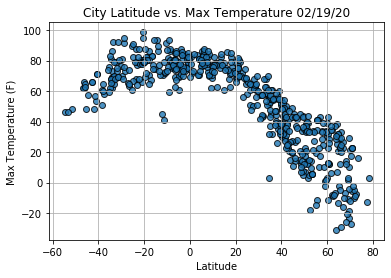

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

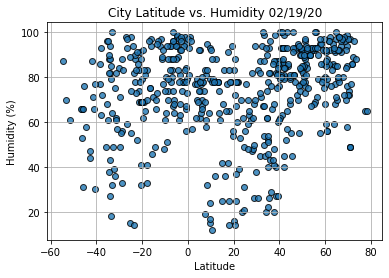

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

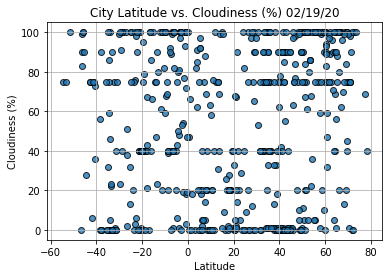

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

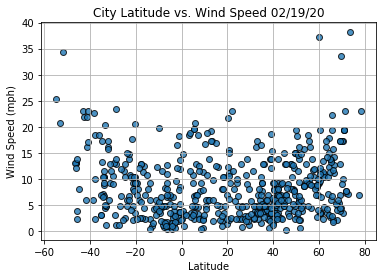

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [60]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [61]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

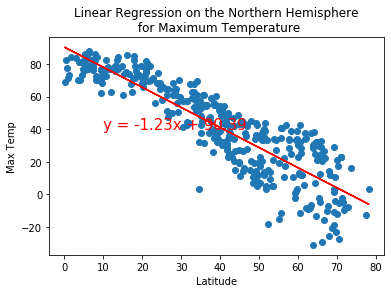

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

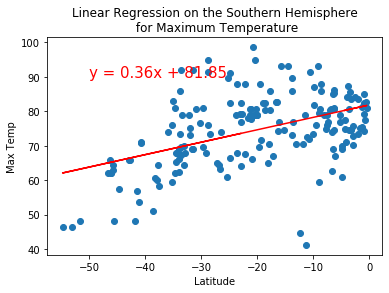

In [64]:
# Linear regression on the Southern Hemisphere
x2_values = southern_hemi_df["Lat"]
y2_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x2_values, y2_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

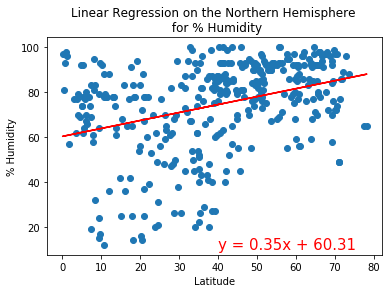

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

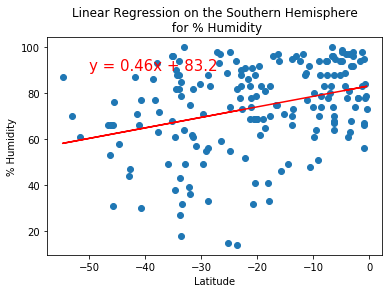

In [66]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,90))

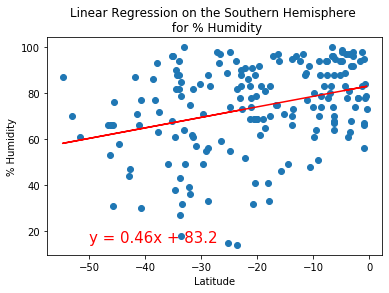

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

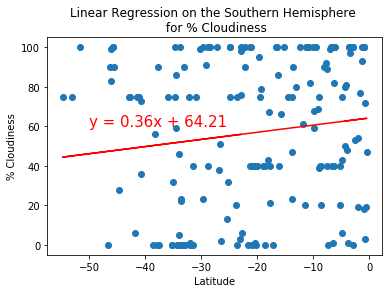

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

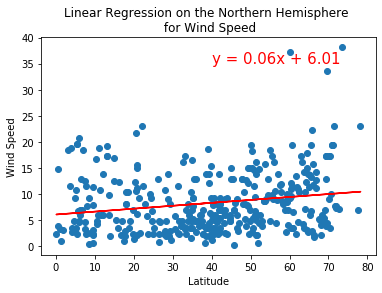

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

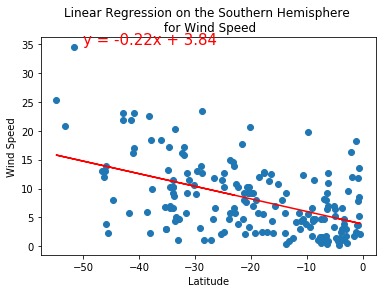

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))